## DATA MINING - SUPERVISED DATA MINING (CLASSIFICATION)



##  Project Title : Absenteeism at Work

###  By : Himanshu Hunge [hh292]

## Introduction:

The Project involves detailed analysis of different classification algorithm on a dataset with numerous attributes and instances. The data mining algorithms which prevails us to predict the instances based on the model’s accuracy. This project comprises model of two different data mining algorithms based on supervised classification.



## ABSTRACT:

There are numerous amount of reasons that are produced all over the case when you don't make it for the work. We tend to give many reasons that are genuine and orderly faced. Notwithstanding, we never inquired about the genuine reasons and how often this scenario we faced while we cannot make it for the work. Identifying the most frequent issue that may become useful strategy and to understand the causes behind this. For example, the most likely cause of not going to work or being absent could be because of Health issue or the transportation on that given day. The other aspect of the cause could be on what frequent day the most employees are not making it to the work. The purpose of this paper is to make a prediction of the absenteeism in time and to predict what is the main cause of most frequent absenteeism.

## BUSINESS UNDERSTANDING

The aim of the project is to analyze the reason for Absenteeism at work data set and create a predictive model based on supervised learning. The model is used to help the consultant to identify an employee will be absent of his/ her work. For instance, examining the effect of components like Social Drinker, Employees children, Work load at office, Transportation expenses can help the consultant to predict the reason of absenteeism.

In [1]:
#All the basic libraries- pandas, sklearn, matplotlib required for the analysis of the 
#dataset are loaded into the notebook.

import pandas as pd       #Pandas software library for data manipulation and analysis
import numpy as np        #numpy package for scientific computing

#Using all basic libraries for mining , statistics and visulization.

from sklearn.metrics import accuracy_score             
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.metrics import f1_score

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Data Understanding and Data Preparation

In [2]:
#Reading the data from csv file "Asenteesim at work".

data = pd.read_csv("Absenteeism_at_work.csv")

In [3]:
data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


In [4]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
#Removing special character of column name "Work load Average/day".

data = data.rename(columns = {'Work load Average/day ':'Work_Load_Avg_per_day'})

In [6]:
data.dtypes

ID                                  int64
Reason for absence                  int64
Month of absence                    int64
Day of the week                     int64
Seasons                             int64
Transportation expense              int64
Distance from Residence to Work     int64
Service time                        int64
Age                                 int64
Work_Load_Avg_per_day              object
Hit target                          int64
Disciplinary failure                int64
Education                           int64
Son                                 int64
Social drinker                      int64
Social smoker                       int64
Pet                                 int64
Weight                              int64
Height                              int64
Body mass index                     int64
Absenteeism time in hours           int64
dtype: object

In [7]:
#Removing special chacater "," (comma) in Work_Load_Avg_per_day column and converting its type to float.

data['Work_Load_Avg_per_day'] = data.Work_Load_Avg_per_day.str.replace(',', '').astype(float)

In [8]:
data.head(3)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work_Load_Avg_per_day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554.0,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554.0,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554.0,...,0,1,0,1,0,0,89,170,31,2


In [9]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work_Load_Avg_per_day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [10]:
data.shape

(740, 21)

In [11]:
data.isnull().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work_Load_Avg_per_day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool

### Training the Data: 

 - Creating the X columns to train the data.
 - From the available 21 attribute it has been observe that following attribute can be eliminated since they 
      do not contribute towards  Target attribute that is Absenteeism time in hours .
 - ID -> Since every ID represent its unique feature of disease which I am not considering here.
 - From following attribute we are trying to understand the reason behind the absenteeism time hence I have
      included all possible columns for the analysis.

In [12]:
x=data.drop(['Absenteeism time in hours','ID'], axis=1)

In [13]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work_Load_Avg_per_day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [14]:
x.shape

(740, 19)

In [15]:
x.head(3)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work_Load_Avg_per_day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239554.0,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239554.0,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239554.0,97,0,1,0,1,0,0,89,170,31


### Declare the Y that is Target.

- Using attribute Absenteeism time in hours as the target. Analysing the Absenteeism time in hours attributes

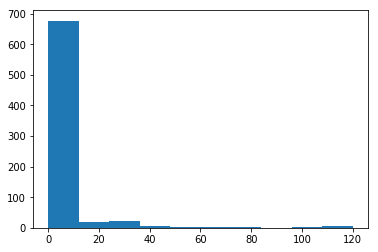

In [16]:
plt.hist(data['Absenteeism time in hours'])
plt.show()

### Understanding the Absenteeism data is to interpret into two sections

In [17]:
data['Absenteeism time in hours'].describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

## Creating a new attribute as Category to be used as Target attribute

The Columns are identified as either 1 or 2 on following basis

Category 1 - The abseteeism time in work that are shared less then 50% that is less than value 3 -> The issue isn't that serious for an Employee.

Category 2 - The abseteeism time in work that are shared more then 50% that is more than value 3 -> The Employee is suffuring with some issue. 

In [18]:
data_class = data['Absenteeism time in hours']
data['category'] = (data_class<=3)*1 | (data_class>3)*2

### Ploting the category data

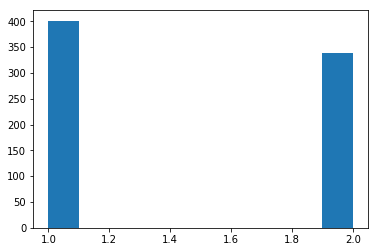

In [19]:
plt.hist(data['category'])
plt.show()

In [20]:
data.head(3)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work_Load_Avg_per_day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,category
0,11,26,7,3,1,289,36,13,33,239554.0,...,1,2,1,0,1,90,172,30,4,2
1,36,0,7,3,1,118,13,18,50,239554.0,...,1,1,1,0,0,98,178,31,0,1
2,3,23,7,4,1,179,51,18,38,239554.0,...,1,0,1,0,0,89,170,31,2,1


In [21]:
data.shape

(740, 22)

### Category is added to the Data as 22 attribute and will be used as target

In [22]:
y = data['category']

In [23]:
# Checking the X and Y
x.shape

(740, 19)

In [24]:
y.shape

(740,)

### Splitting the data into training and test data taking 20% from the overall data as test data and 80% as training data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)

### Verifying the Data

In [26]:
X_train.shape

(592, 19)

In [27]:
y_train.shape

(592,)

In [28]:
X_test.shape

(148, 19)

In [29]:
y_test.shape

(148,)

## Training Data Analysis and Identifying the most relevant attributes

### Using Decision Tree Classifier for finding accuracy of training data. 



In [30]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=100)
rank_classifier.fit(X_train,y_train)
print(type(rank_classifier))
Predictions_train = rank_classifier.predict(X_train)

<class 'sklearn.tree.tree.DecisionTreeClassifier'>


In [31]:
# Verifying the accuracy

Training_Accuracy = accuracy_score(y_true = y_train, y_pred = Predictions_train)

print("Training Data Acuracy-")
print(Training_Accuracy)

Training Data Acuracy-
0.8057432432432432


## Using Recursive feature elimination for identifying the most relevant attributes

Recursive Feature Elimination or RFE uses a model ( eg. linear Regression or SVM) to select either the best or worst-performing feature, and then excludes that feature. The whole process is then iterated until all features in the dataset are used up ( or up to a user-defined limit). Sklearn conveniently possesses a RFE function via the sklearn.feature_selection call and I use this along with a simple linear regression model and loistic regression model for ranking the features and to decide on the attribute for the model building.



In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#use linear regression as the model
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True False
 False False False False False False False]
[11 14  6 10 15 17 13 16 19 18  1  5  3  2  4 12  8  9  7]


In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#use logistic regression as the model
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True False
 False False False False False False False]
[ 7  8  4  6 17 18 11 14 19 13  1  5  2  3  9 10 15 16 12]


In [34]:
list(x)

['Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work_Load_Avg_per_day',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index']

In [35]:
x_New = data[['Disciplinary failure','Social drinker','Son','Social smoker','Education','Day of the week','Height','Weight','Body mass index','Seasons','Reason for absence','Pet','Service time','Month of absence','Transportation expense','Age','Distance from Residence to Work','Hit target','Work_Load_Avg_per_day']]

In [36]:
x_New.shape

(740, 19)

# Data Mining Algorithms



## Classification Analysis:
Classification is a data mining technique that assigns categories to a collection of data in order to aid in more accurate predictions and analysis. This method is utilized to recover critical and important information about a data set. It is utilized to organize information in various classes. Very large databases are becoming the norm in today's world of "big data." The primary challenge of big data is how to make sense of it. And sheer volume is not the only problem: big data also tends to be diverse, unstructured and fast-changing. Consider audio and video data, social media posts, 3D data or geospatial data. This kind of data is not easily categorized or organized. To meet this challenge, a range of automatic methods for extracting useful information has been developed, among them classification.

### Applications:
Classification, and other data mining techniques, is behind much of our day-to-day experience as consumers. Weather predictions might make use of classification to report whether the day will be rainy, sunny or cloudy. The medical profession might analyze health conditions to predict medical outcomes. From fraud detection to product offers, classification is behind the scenes every day analyzing data and producing predictions.

## Category 3:  Decision tree implementation after feature selection

### Decision Tree Classifier -  CART / C4.5 (Classification and Regression Trees)

A decision tree is a guide of the conceivable results of a progression of related choices. Decision tree is one of the most used techniques in data mining because of its simplicity to explain the results. Besides, there are decision tree algorithms that work with parallel and incremental techniques, which help to process large databases for classifying new objects faster than traditional algorithms.
A decision tree ordinarily begins with a single node, which branches into conceivable results. 

### Applications:
Decision trees are very “user-friendly” because they are easy to understand by practically everyone and provide reasonably accurate results. They provide an easy to analyze breakdown of the data and can be used practically in every business area that requires decision-making, including, but not limited to marketing, pharmacology, financial analysis, manufacturing, production, etc.

In [38]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
rank_classifier.fit(X_train,y_train)
print(type(rank_classifier))
Predictions = rank_classifier.predict(X_test)

<class 'sklearn.tree.tree.DecisionTreeClassifier'>


In [39]:
rank_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [40]:
#calculating the accuracy score
Accuracy_DT = accuracy_score(y_true = y_test, y_pred = Predictions)
Accuracy_DT

0.8243243243243243

In [41]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, Predictions)
print(confusion)
TP_DT = confusion[1, 1]
TN_DT = confusion[0, 0]
FP_DT = confusion[0, 1]
FN_DT = confusion[1, 0]

[[65 16]
 [10 57]]


In [42]:
# Calculating "Misclassification Rate"which represent how often is the classifier incorrect?
Mis_Rate_DT = (1 - metrics.accuracy_score(y_test, Predictions))
print("Misclassification Rate: ",Mis_Rate_DT)

#Precision: When a positive value is predicted, how often is the prediction correct?
precision_DT = metrics.precision_score(y_test, Predictions)
print("Precision: ",precision_DT)

#Recall:Recall is the fraction of the relevant results that are successfully retrieved.
recall_DT = metrics.recall_score(y_test, Predictions)
print("recall: ",recall_DT)

#F1 Score: balanced F-score or F-measure which measure's test accuracy
f1_DT=f1_score(y_test,Predictions)
print("F1_Score:", f1_DT)


#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Also known as "True Positive Rate" or "Recall"
sensitivity_DT = TP_DT / float(FN_DT + TP_DT)
print("Sensitivity: ",sensitivity_DT)

#Specificity: When the actual value is negative.
specificity_DT = TN_DT / (TN_DT + FP_DT)
print("Specificity: ",specificity_DT)


Misclassification Rate:  0.17567567567567566
Precision:  0.8666666666666667
recall:  0.8024691358024691
F1_Score: 0.8333333333333334
Sensitivity:  0.8507462686567164
Specificity:  0.8024691358024691


In [43]:
#Cross Validation scoreDEPLOYMENT  
scores_DT = cross_validation.cross_val_score(rank_classifier, x_New, y, cv=10).mean()
print (scores_DT)

0.7579901271134147


In [44]:
#from sklearn.preprocessing import label_binarize.Calculating fpr,tpr for ROC.

y_pred_prob = rank_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob,pos_label=2)

In [45]:
roc_auc = auc(fpr, tpr)

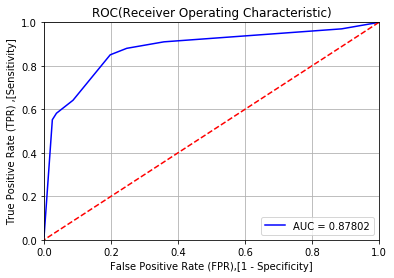

In [46]:
plt.title('ROC(Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.5f'% roc_auc)
plt.legend(loc='lower right')
plt.rcParams['font.size'] = 10
plt.plot([1,0],[1,0],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate (TPR) ,[Sensitivity]')
plt.xlabel('False Positive Rate (FPR),[1 - Specificity]')
plt.grid(True)
plt.show()

In [47]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [48]:
evaluate_threshold(0.5)

Sensitivity: 0.8507462686567164
Specificity: 0.8024691358024691


In [49]:
#loss function
from sklearn.metrics import log_loss
Loss_DT = log_loss(y_test,y_pred_prob)
Loss_DT

0.8462093123888312

# Support Vector Machine(SVM)
A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labelled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two-dimensional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

## Category 1 : LIBSVM radial basis function (RBF) kernel

Here I am using (radial basis fucntion) RBF kernal for SVM algorithm.

## Applications
As we have seen, SVMs depends on supervised learning algorithms. The aim of using SVM is to correctly classify unseen data. SVMs have several applications in several fields. Some common applications of SVM are- Face detection, Text and hypertext categorization, Classification of images , Bioinformatics, Protein fold and remote homology detection , Handwriting recognition , Generalized predictive control(GPC)

In [50]:
from sklearn import svm

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x_New, y, test_size=0.20, random_state=250)

In [52]:
svm_classifier = svm.SVC(probability=True)

In [53]:
svm_classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
Predictions_svm = svm_classifier.predict(X_test)
Accuracy_SVM = accuracy_score(y_true = y_test, y_pred = Predictions_svm)
Accuracy_SVM

0.7094594594594594

In [55]:
confusion_matrix(y_test,Predictions_svm)
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, Predictions_svm)
print(confusion)
TP_SVM = confusion[1, 1]
TN_SVM = confusion[0, 0]
FP_SVM = confusion[0, 1]
FN_SVM = confusion[1, 0]


[[43 38]
 [ 5 62]]


In [56]:
# Calculating "Misclassification Rate"how often is the classifier incorrect?
Mis_Rate_SVM = (1 - metrics.accuracy_score(y_test, Predictions_svm))
print("Misclassification Rate: ",Mis_Rate_SVM)

#Precision: When a positive value is predicted, how often is the prediction correct?
precision_SVM = metrics.precision_score(y_test, Predictions_svm)
print("Precision: ",precision_SVM)

#Recall:Recall is the fraction of the relevant results that are successfully retrieved.
recall_SVM = metrics.recall_score(y_test, Predictions_svm)
print("Recall: ",recall_SVM)

#F1 Score: balanced F-score or F-measure which measure's test accuracy.
f1_SVM=f1_score(y_test,Predictions_svm)
print("F1_Score:", f1_SVM)

#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Also known as "True Positive Rate" or "Recall"
sensitivity_SVM = TP_SVM / float(FN_SVM + TP_SVM)
print("Sensitivity: ",sensitivity_SVM)

#Specificity: When the actual value is negative, how often is the prediction correct?
#This specifies how "specific" (or "selective") is the classifier in predicting positive instances?
specificity_SVM = TN_SVM / (TN_SVM + FP_SVM)
print("Specificity: ",specificity_SVM)

Misclassification Rate:  0.29054054054054057
Precision:  0.8958333333333334
Recall:  0.5308641975308642
F1_Score: 0.6666666666666666
Sensitivity:  0.9253731343283582
Specificity:  0.5308641975308642


In [57]:
y_pred_prob = svm_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob,pos_label=2)

In [58]:
roc_auc = auc(fpr, tpr)

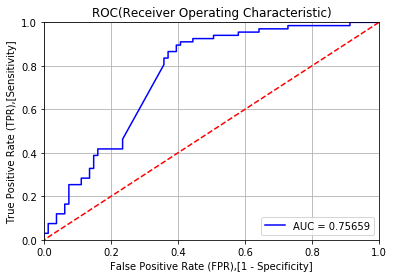

In [59]:
plt.title('ROC(Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.5f'% roc_auc)
plt.legend(loc='lower right')
plt.rcParams['font.size'] = 10
plt.plot([1,0],[1,0],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.ylabel('True Positive Rate (TPR),[Sensitivity]')
plt.xlabel('False Positive Rate (FPR),[1 - Specificity]')
plt.grid(True)
plt.show()

In [60]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [61]:
evaluate_threshold(0.5)

Sensitivity: 0.9253731343283582
Specificity: 0.5555555555555556


In [62]:
#loss function
from sklearn.metrics import log_loss
Loss_SVM = log_loss(y_test,y_pred_prob)
Loss_SVM

0.5818432784656484

# RESULTS

### Comparing the models based on following factors
Accuracy , Loss , True Positive , False Positive , True Negative , False Negative , Sensitivity , Precision, Recall and F1 Score

In [63]:
resultdf = pd.DataFrame(columns=["Model","Accuracy","Loss","TP","FP","TN","FN","Sensitivity","Specificity","Precision","Recall","F1 score"])
resultdf.loc[0] = ["Decision Tree", Accuracy_DT,Loss_DT,TP_DT,FP_DT,TN_DT,FN_DT,sensitivity_DT, specificity_DT,precision_DT,recall_DT,f1_DT]
resultdf.loc[1] = ["SVM", Accuracy_SVM, Loss_SVM, TP_SVM,FP_SVM,TN_SVM,FN_SVM,sensitivity_SVM, specificity_SVM,precision_SVM,recall_SVM,f1_SVM]

resultdf

,Model,Accuracy,Loss,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,F1 score
0,Decision Tree,0.824324,0.846209,57,16,65,10,0.850746,0.802469,0.866667,0.802469,0.833333
1,SVM,0.709459,0.581843,62,38,43,5,0.925373,0.530864,0.895833,0.530864,0.666667


In [64]:
arraycuracy =[]
arraycuracy.append(Accuracy_DT)
arraycuracy.append(Accuracy_SVM)

In [65]:
precisionray =[]
precisionray.append(precision_DT)
precisionray.append(precision_SVM)

In [66]:
recallray =[]
recallray.append(recall_DT)
recallray.append(recall_SVM)

In [67]:
f1ray=[]
f1ray.append(f1_DT)
f1ray.append(f1_SVM)

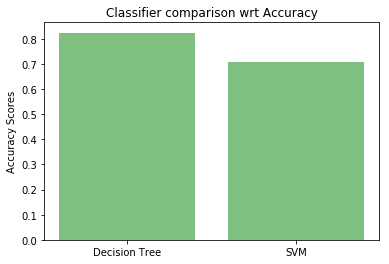

In [68]:
import  matplotlib.pyplot  as plt
classifier_names=('Decision Tree','SVM')
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis, arraycuracy, alpha=0.5,color='Green')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Accuracy Scores')
plt.title('Classifier comparison wrt Accuracy')
plt.show()

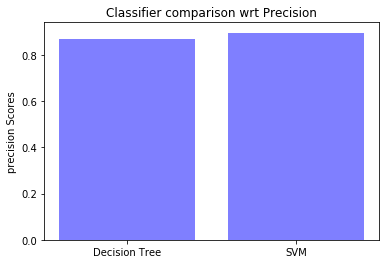

In [69]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,precisionray, alpha=0.5,color='Blue',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('precision Scores')
plt.title('Classifier comparison wrt Precision')
plt.show()

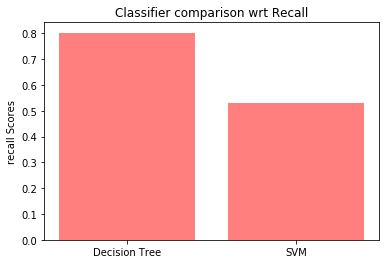

In [70]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,recallray, alpha=0.5,color='Red',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('recall Scores')
plt.title('Classifier comparison wrt Recall')
plt.show()

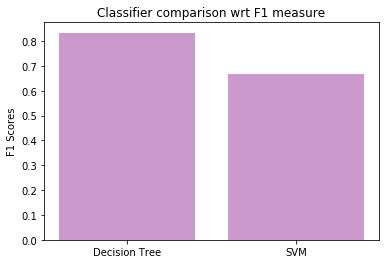

In [71]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,f1ray, alpha=0.4,color='Purple',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('F1 Scores')
plt.title('Classifier comparison wrt F1 measure')
plt.show()

# Category 12: LogisticRegression 

### Note: For Curosity in finding high accuracy I have implemented Logistic Regression algorithm for comparing accuracy.

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
LR_Classifier = LogisticRegression(random_state=250)

In [74]:
LR_Classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=250, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
Predictions_Logistic = LR_Classifier.predict(X_test)

In [76]:
Accuracy_Logistic = accuracy_score(y_true = y_test, y_pred = Predictions_Logistic)

In [77]:
Accuracy_Logistic

0.7432432432432432

In [78]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, Predictions_Logistic)
print(confusion)
TP_LR = confusion[1, 1]
TN_LR = confusion[0, 0]
FP_LR = confusion[0, 1]
FN_LR = confusion[1, 0]

[[68 13]
 [25 42]]


In [79]:
# Calculating "Misclassification Rate"how often is the classifier incorrect?
Mis_Rate_LR = (1 - metrics.accuracy_score(y_test, Predictions_Logistic))
print("Misclassification Rate: ",Mis_Rate_LR)

#Precision: When a positive value is predicted, how often is the prediction correct?
precision_LR = metrics.precision_score(y_test, Predictions_Logistic)
print("Precision: ",precision_LR)

#Recall:Recall is the fraction of the relevant results that are successfully retrieved.
recall_LR = metrics.recall_score(y_test, Predictions_Logistic)
print("Recall: ",recall_LR)

#F1 Score: balanced F-score or F-measure which measure's test accuracy.
f1_LR=f1_score(y_test,Predictions_Logistic)
print("F1_Score:", f1_LR)

#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Also known as "True Positive Rate" or "Recall"
sensitivity_LR = TP_LR / float(FN_LR + TP_LR)
print("Sensitivity: ",sensitivity_LR)

#Specificity: When the actual value is negative, how often is the prediction correct?
#How "specific" (or "selective") is the classifier in predicting positive instances?
specificity_LR = TN_LR / (TN_LR + FP_LR)
print("Specificity: ",specificity_LR)

Misclassification Rate:  0.2567567567567568
Precision:  0.7311827956989247
Recall:  0.8395061728395061
F1_Score: 0.7816091954022988
Sensitivity:  0.6268656716417911
Specificity:  0.8395061728395061


In [80]:
y_pred_prob = LR_Classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob,pos_label=2)

In [81]:
roc_auc = auc(fpr, tpr)

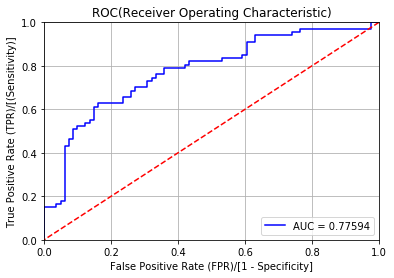

In [82]:
plt.title('ROC(Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.5f'% roc_auc)
plt.legend(loc='lower right')
plt.rcParams['font.size'] = 10
plt.plot([1,0],[1,0],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.ylabel('True Positive Rate (TPR)/[(Sensitivity)]')
plt.xlabel('False Positive Rate (FPR)/[1 - Specificity]')
plt.grid(True)
plt.show()

In [83]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [84]:
evaluate_threshold(0.5)

Sensitivity: 0.6268656716417911
Specificity: 0.8395061728395061


In [85]:
#loss function
from sklearn.metrics import log_loss
Loss_Logistic = log_loss(y_test,y_pred_prob)
Loss_Logistic

0.6022166534726436

# RESULT - Comparing Decision Tree , SVM and Logistic Regression.

In [86]:
resultdf = pd.DataFrame(columns=["Model","Accuracy","Loss","TP","FP","TN","FN","Sensitivity","Specificity","Precision","Recall","F1 Score"])
resultdf.loc[0] = ["Decision Tree", Accuracy_DT,Loss_DT,TP_DT,FP_DT,TN_DT,FN_DT,sensitivity_DT, specificity_DT,precision_DT,recall_DT,f1_DT]
resultdf.loc[1] = ["SVM", Accuracy_SVM, Loss_SVM, TP_SVM,FP_SVM,TN_SVM,FN_SVM,sensitivity_SVM, specificity_SVM,precision_SVM,recall_SVM,f1_SVM]
resultdf.loc[2] = ["LogisticRegression", Accuracy_Logistic, Loss_Logistic, TP_LR,FP_LR,TN_LR,FN_LR,sensitivity_LR, specificity_LR,precision_LR,recall_LR,f1_LR]
resultdf

,Model,Accuracy,Loss,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall,F1 Score
0,Decision Tree,0.824324,0.846209,57,16,65,10,0.850746,0.802469,0.866667,0.802469,0.833333
1,SVM,0.709459,0.581843,62,38,43,5,0.925373,0.530864,0.895833,0.530864,0.666667
2,LogisticRegression,0.743243,0.602217,42,13,68,25,0.626866,0.839506,0.731183,0.839506,0.781609


In [87]:
arraycuracy =[]
arraycuracy.append(Accuracy_DT)
arraycuracy.append(Accuracy_SVM)
arraycuracy.append(Accuracy_Logistic)

In [88]:
precisionray =[]
precisionray.append(precision_DT)
precisionray.append(precision_SVM)
precisionray.append(precision_LR)

In [89]:
recallray =[]
recallray.append(recall_DT)
recallray.append(recall_SVM)
recallray.append(recall_LR)

In [90]:
f1ray=[]
f1ray.append(f1_DT)
f1ray.append(f1_SVM)
f1ray.append(f1_LR)

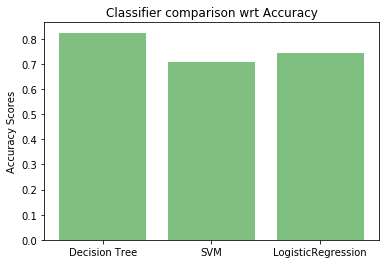

In [91]:
import  matplotlib.pyplot  as plt
classifier_names=('Decision Tree','SVM','LogisticRegression')
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis, arraycuracy, alpha=0.5,color='Green')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Accuracy Scores')
plt.title('Classifier comparison wrt Accuracy')
plt.show()

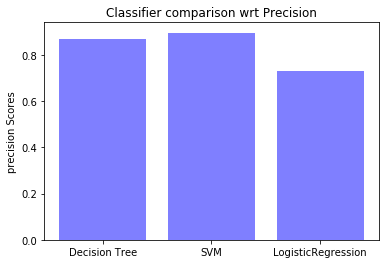

In [92]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,precisionray, alpha=0.5,color='Blue',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('precision Scores')
plt.title('Classifier comparison wrt Precision')
plt.show()

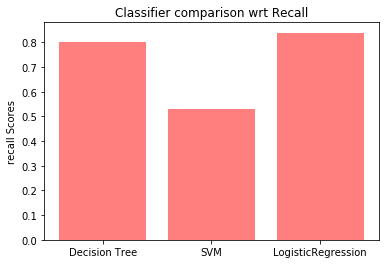

In [93]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,recallray, alpha=0.5,color='Red',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('recall Scores')
plt.title('Classifier comparison wrt Recall')
plt.show()

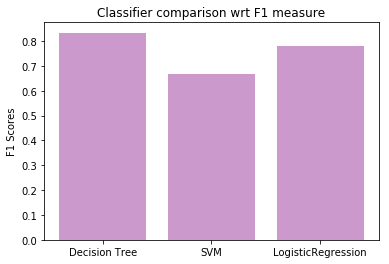

In [94]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,f1ray, alpha=0.4,color='Purple',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('F1 Scores')
plt.title('Classifier comparison wrt F1 measure')
plt.show()

# CONCLUSION

With the aim to predict the absenteeism in work on the various factors we build models based on three different 
supervised classification techniques 

- Decision Tree
- Support Vector Machine
- Logistic Regression

As we can observe through the results, The Decision tree has performed better as compared to SVM
and Logistic Regression in accuracy, sensitivity, Precision and F1 Score.

From the available 22 attributes I identified 19 based on domain knowledge and the recursive feature elimination(RFE) 
model. 

Some of the key factors that contribute towards absenteeism at work are  
-  'Disciplinary failure' is the bissgest issue of absenteeism.
-   How mnay children does an employee has ?
-   Does drinking alcohol is an issue of abenteeism - 'Social Drinker'?

The Decison Tree model that we have built gives **82%** accuracy on the testing data.
Thus, I have built a model that can predict whether an Employee will be absent on for the work given that the features 
provided for his/her absence.